# **Insurance Claims Prediction**
**Project Plan for Insurance Claims Prediction**

[Dataset](https://www.kaggle.com/datasets/litvinenko630/insurance-claims)

## **1. Understanding the Data and Business Objective**

- **Familiarize with the Dataset**
    - Review the data dictionary to understand each feature.
    - Identify data types (numerical, categorical, binary).
    - Understand the target variable `claim_status`.
- **Define the Business Problem**
    - Objective: Predict the likelihood of a policyholder making an insurance claim.
    - Importance: Improve risk assessment, pricing strategies, and fraud detection.


In [114]:
import pandas as pd
DATA_PATH = '../data/'
# Load the dataset
FILE_PATH = f"{DATA_PATH}/raw/Insurance claims data.csv"
insurance_data = pd.read_csv(FILE_PATH)
insurance_data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [115]:
# Display basic information about the dataset
insurance_data_info = insurance_data.info()
insurance_data_head = insurance_data.head()
insurance_data.describe()

insurance_data_info, insurance_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

(None,
    policy_id  subscription_length  vehicle_age  customer_age region_code  \
 0  POL045360                  9.3          1.2            41          C8   
 1  POL016745                  8.2          1.8            35          C2   
 2  POL007194                  9.5          0.2            44          C8   
 3  POL018146                  5.2          0.4            44         C10   
 4  POL049011                 10.1          1.0            56         C13   
 
    region_density segment model fuel_type     max_torque  ... is_brake_assist  \
 0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
 1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
 2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
 3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
 4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   
 
   is_power_door_locks  is_central_


#### **1.1 Data Familiarization**

- The dataset consists of 41 columns and 58,592 records.
- The target variable for prediction is `claim_status`, which indicates if a claim was made (1) or not (0).
- Key feature categories include:
    - **Policy Information**: `policy_id`, `subscription_length`
    - **Customer Information**: `customer_age`, `region_code`, `region_density`
    - **Vehicle Characteristics**: `vehicle_age`, `model`, `fuel_type`, `max_torque`, `max_power`, `engine_type`
    - **Safety and Features**: Binary indicators like `is_esc`, `is_tpms`, `is_parking_sensors`
    - **Specifications**: `displacement`, `cylinder`, `length`, `width`, `gross_weight`
    - **Safety Ratings**: `ncap_rating`

#### **1.2 Data Types**

- **Numerical Features**: `subscription_length`, `vehicle_age`, `customer_age`, `turning_radius`, `displacement`, `cylinder`, `length`, `width`, `gross_weight`, `ncap_rating`.
- **Categorical Features**: `policy_id`, `region_code`, `segment`, `model`, `fuel_type`, `engine_type`, `rear_brakes_type`, `transmission_type`, `steering_type`.
- **Binary Indicators**: Columns starting with `is_`, indicating `Yes` or `No`.

#### **1.3 Business Objective**

- **Objective**: Predict whether a policyholder will file an insurance claim.
- **Importance**: Accurate claim prediction helps in risk assessment, policy pricing, and identifying potential fraud cases.

## **2. Exploratory Data Analysis (EDA)**

- **Data Overview**
    - **Descriptive Statistics**
        - Calculate mean, median, mode, standard deviation for numerical features.
        - Analyze frequency counts for categorical features.
    - **Data Types and Structure**
        - Ensure correct data types (e.g., integers, floats, categories).
        - Check for unique values in identifiers like `policy_id`.
    - **Missing Values**
        - Identify missing or null values in each feature.
    - **Class Distribution**
        - Assess the imbalance in `claim_status`.
- **Visualization**
    - **Univariate Analysis**
        - Histograms and density plots for numerical features.
        - Bar plots for categorical features.
    - **Bivariate Analysis**
        - Box plots of numerical features against `claim_status`.
        - Mosaic plots for categorical features against `claim_status`.
    - **Correlation Matrix**
        - Compute Pearson/Spearman correlation coefficients.
        - Identify multicollinearity among features.
    - **Class Imbalance Visualization**
        - Pie chart or bar plot showing the proportion of classes in `claim_status`.

In [116]:
# Descriptive statistics for numerical features
descriptive_stats = insurance_data.describe()

# Check for unique values in `policy_id` to ensure it serves as an identifier
unique_policy_id_count = insurance_data['policy_id'].nunique()

# Check for missing values in the dataset
missing_values = insurance_data.isnull().sum()

# Class distribution for `claim_status`
class_distribution = insurance_data['claim_status'].value_counts(normalize=True)

(descriptive_stats, unique_policy_id_count, missing_values, class_distribution)


(       subscription_length   vehicle_age  customer_age  region_density  \
 count         58592.000000  58592.000000  58592.000000    58592.000000   
 mean              6.111688      1.388473     44.823935    18826.858667   
 std               4.142790      1.134413      6.935604    17660.174792   
 min               0.000000      0.000000     35.000000      290.000000   
 25%               2.100000      0.400000     39.000000     6112.000000   
 50%               5.700000      1.200000     44.000000     8794.000000   
 75%              10.400000      2.200000     49.000000    27003.000000   
 max              14.000000     20.000000     75.000000    73430.000000   
 
             airbags  displacement      cylinder  turning_radius        length  \
 count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
 mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
 std        1.832641    266.304786      0.483616        0.228061    311.45711

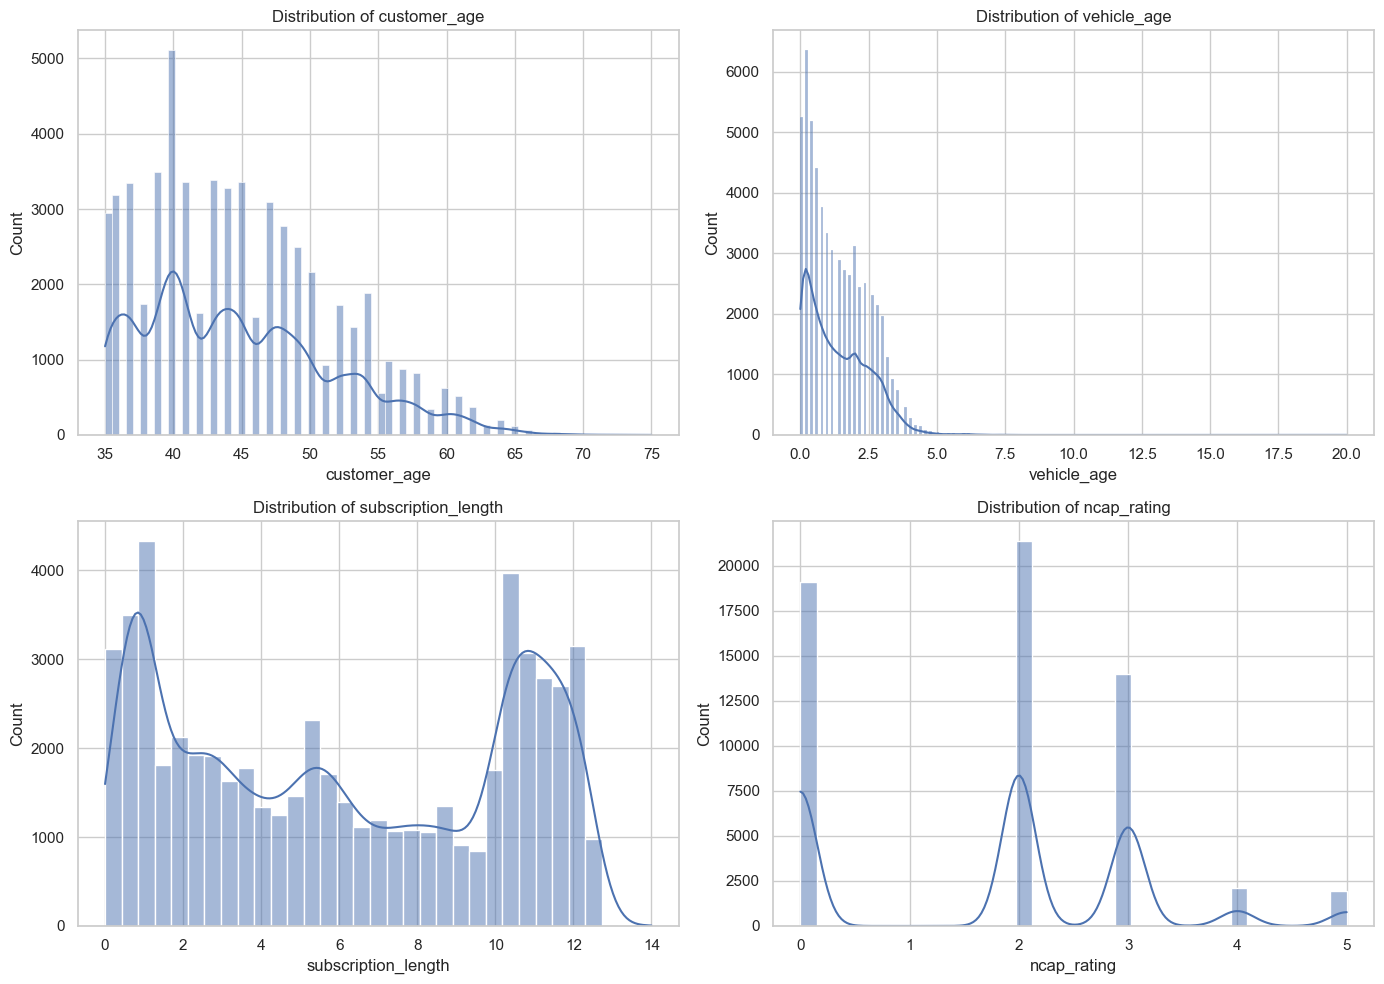

/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_51002/2942891025.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=insurance_data, palette='viridis')


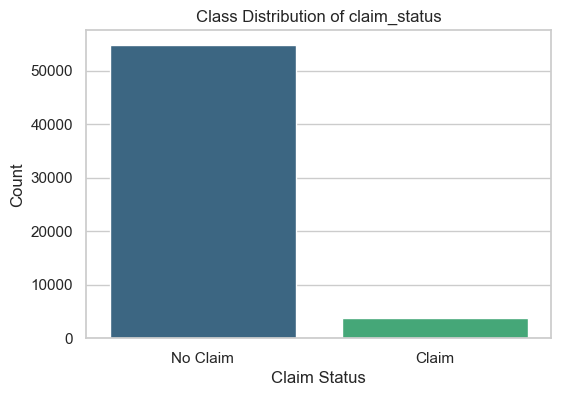

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure aesthetics
sns.set(style="whitegrid")

# Univariate Analysis: Histograms for numerical features
numerical_features = ['customer_age', 'vehicle_age', 'subscription_length', 'ncap_rating']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for feature, ax in zip(numerical_features, axes.flatten()):
    sns.histplot(insurance_data[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

# Class distribution bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='claim_status', data=insurance_data, palette='viridis')
plt.title('Class Distribution of claim_status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.show()


- **Univariate Distributions**:
    - `customer_age` has a right-skewed distribution centered around middle-aged policyholders.
    - `vehicle_age` mostly includes newer vehicles, but there are outliers with older vehicles.
    - `subscription_length` has a relatively uniform spread across different durations.
    - `ncap_rating` displays a distribution skewed towards lower safety ratings.
- **Class Distribution**:
    - The `claim_status` plot confirms the class imbalance, with the majority of instances being non-claims.

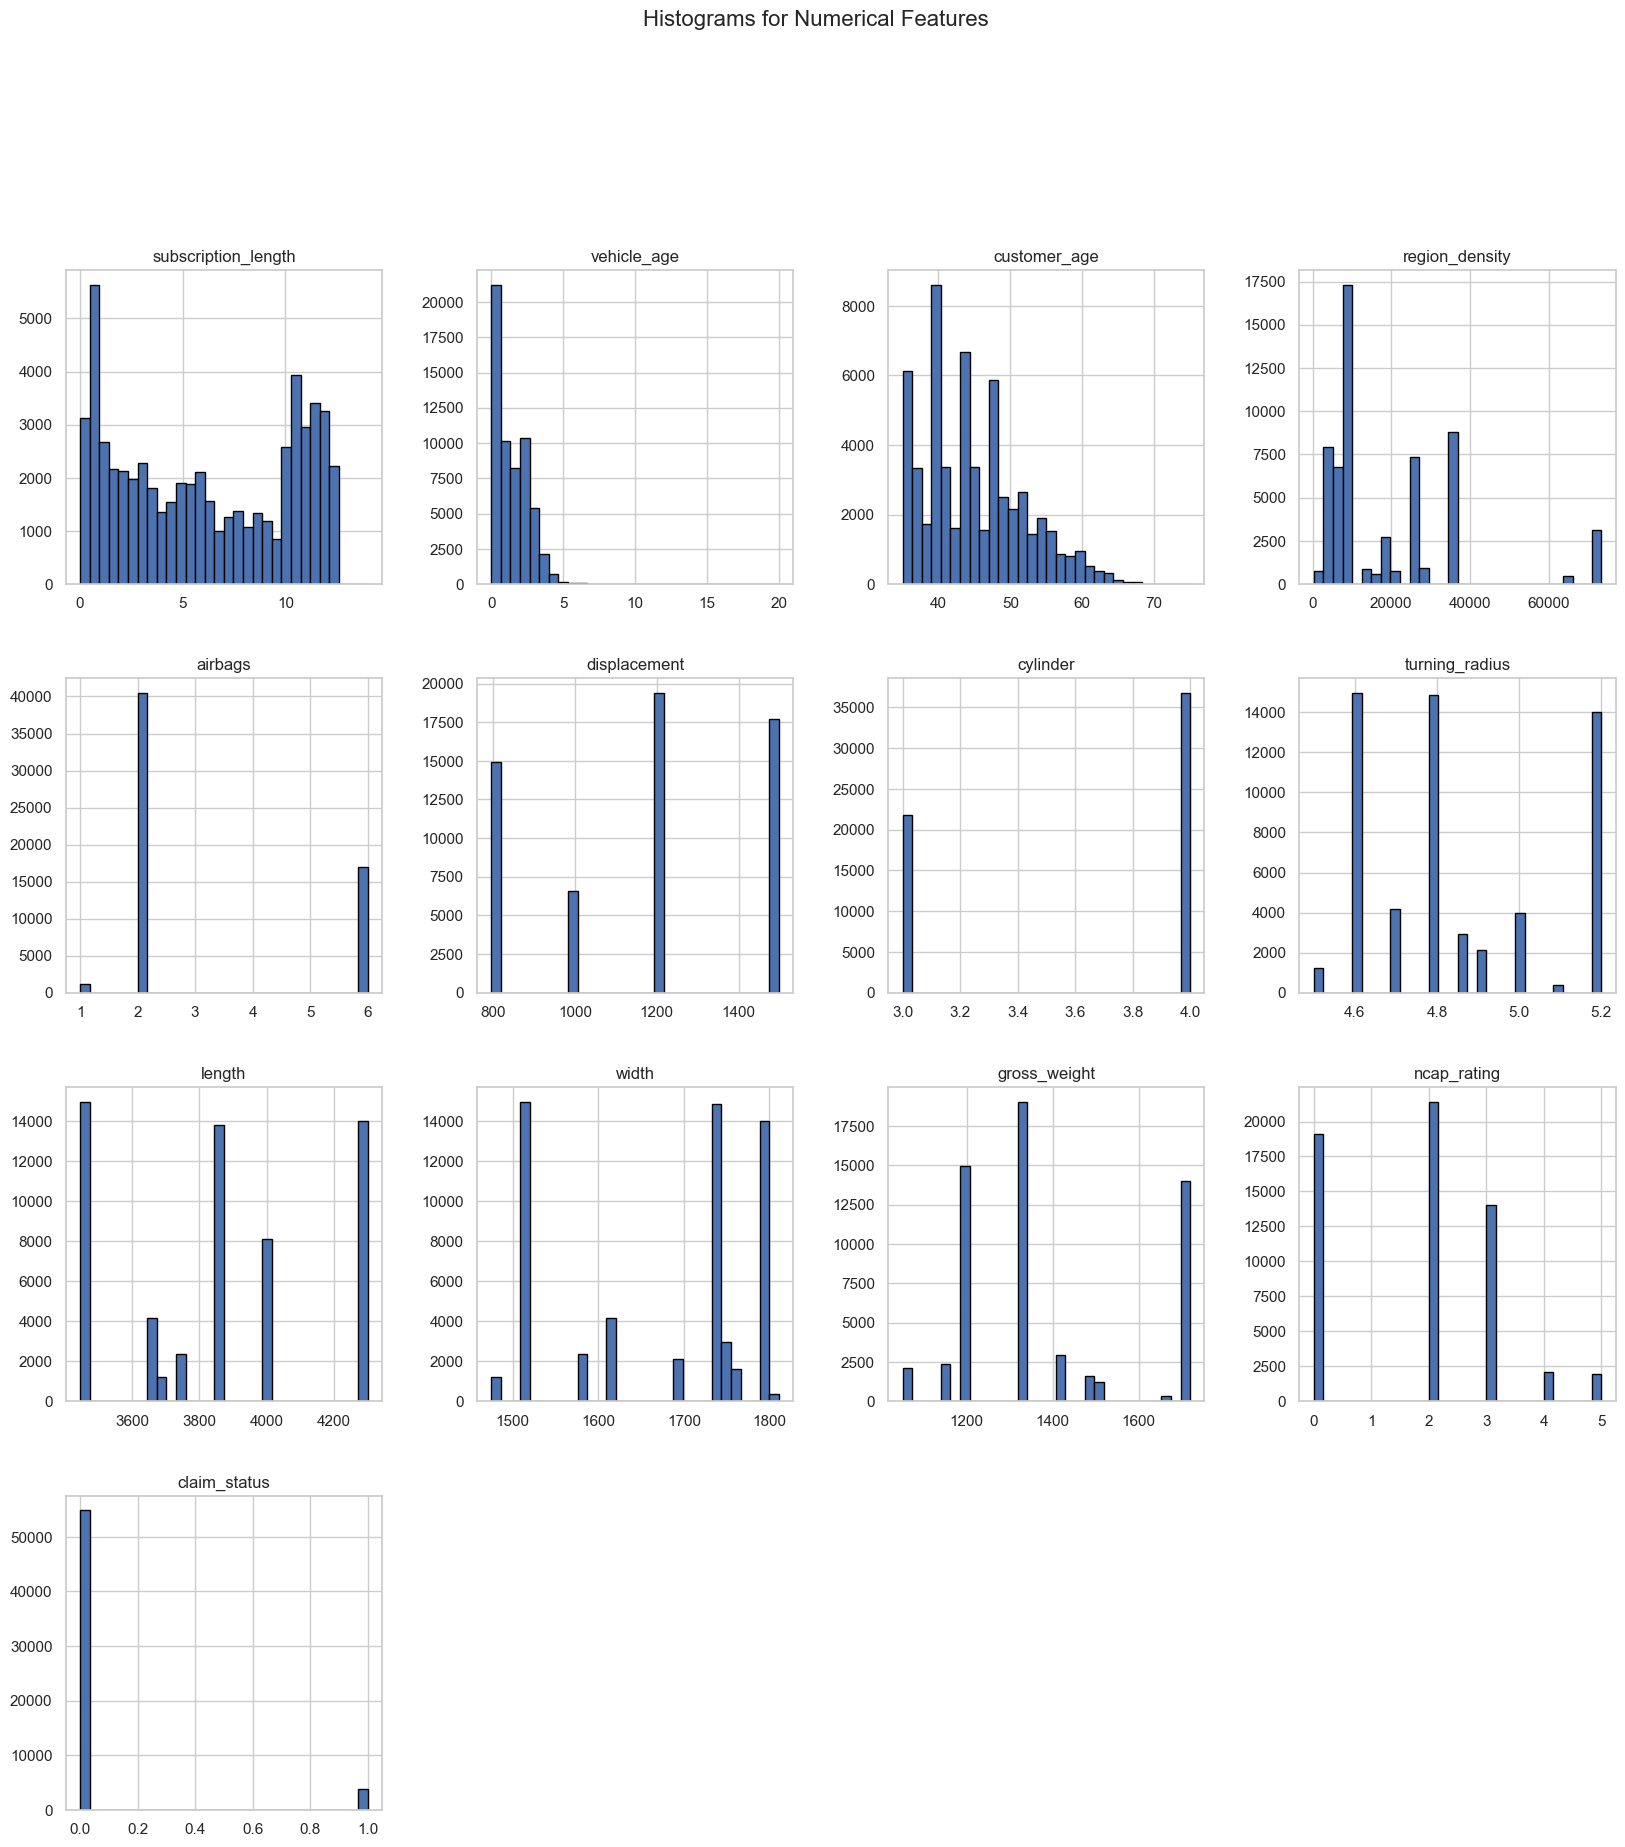

/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_51002/4067932349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=insurance_data, ax=ax, palette='pastel')
/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_51002/4067932349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=insurance_data, ax=ax, palette='pastel')
/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_51002/4067932349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=insurance_data, ax=ax, p

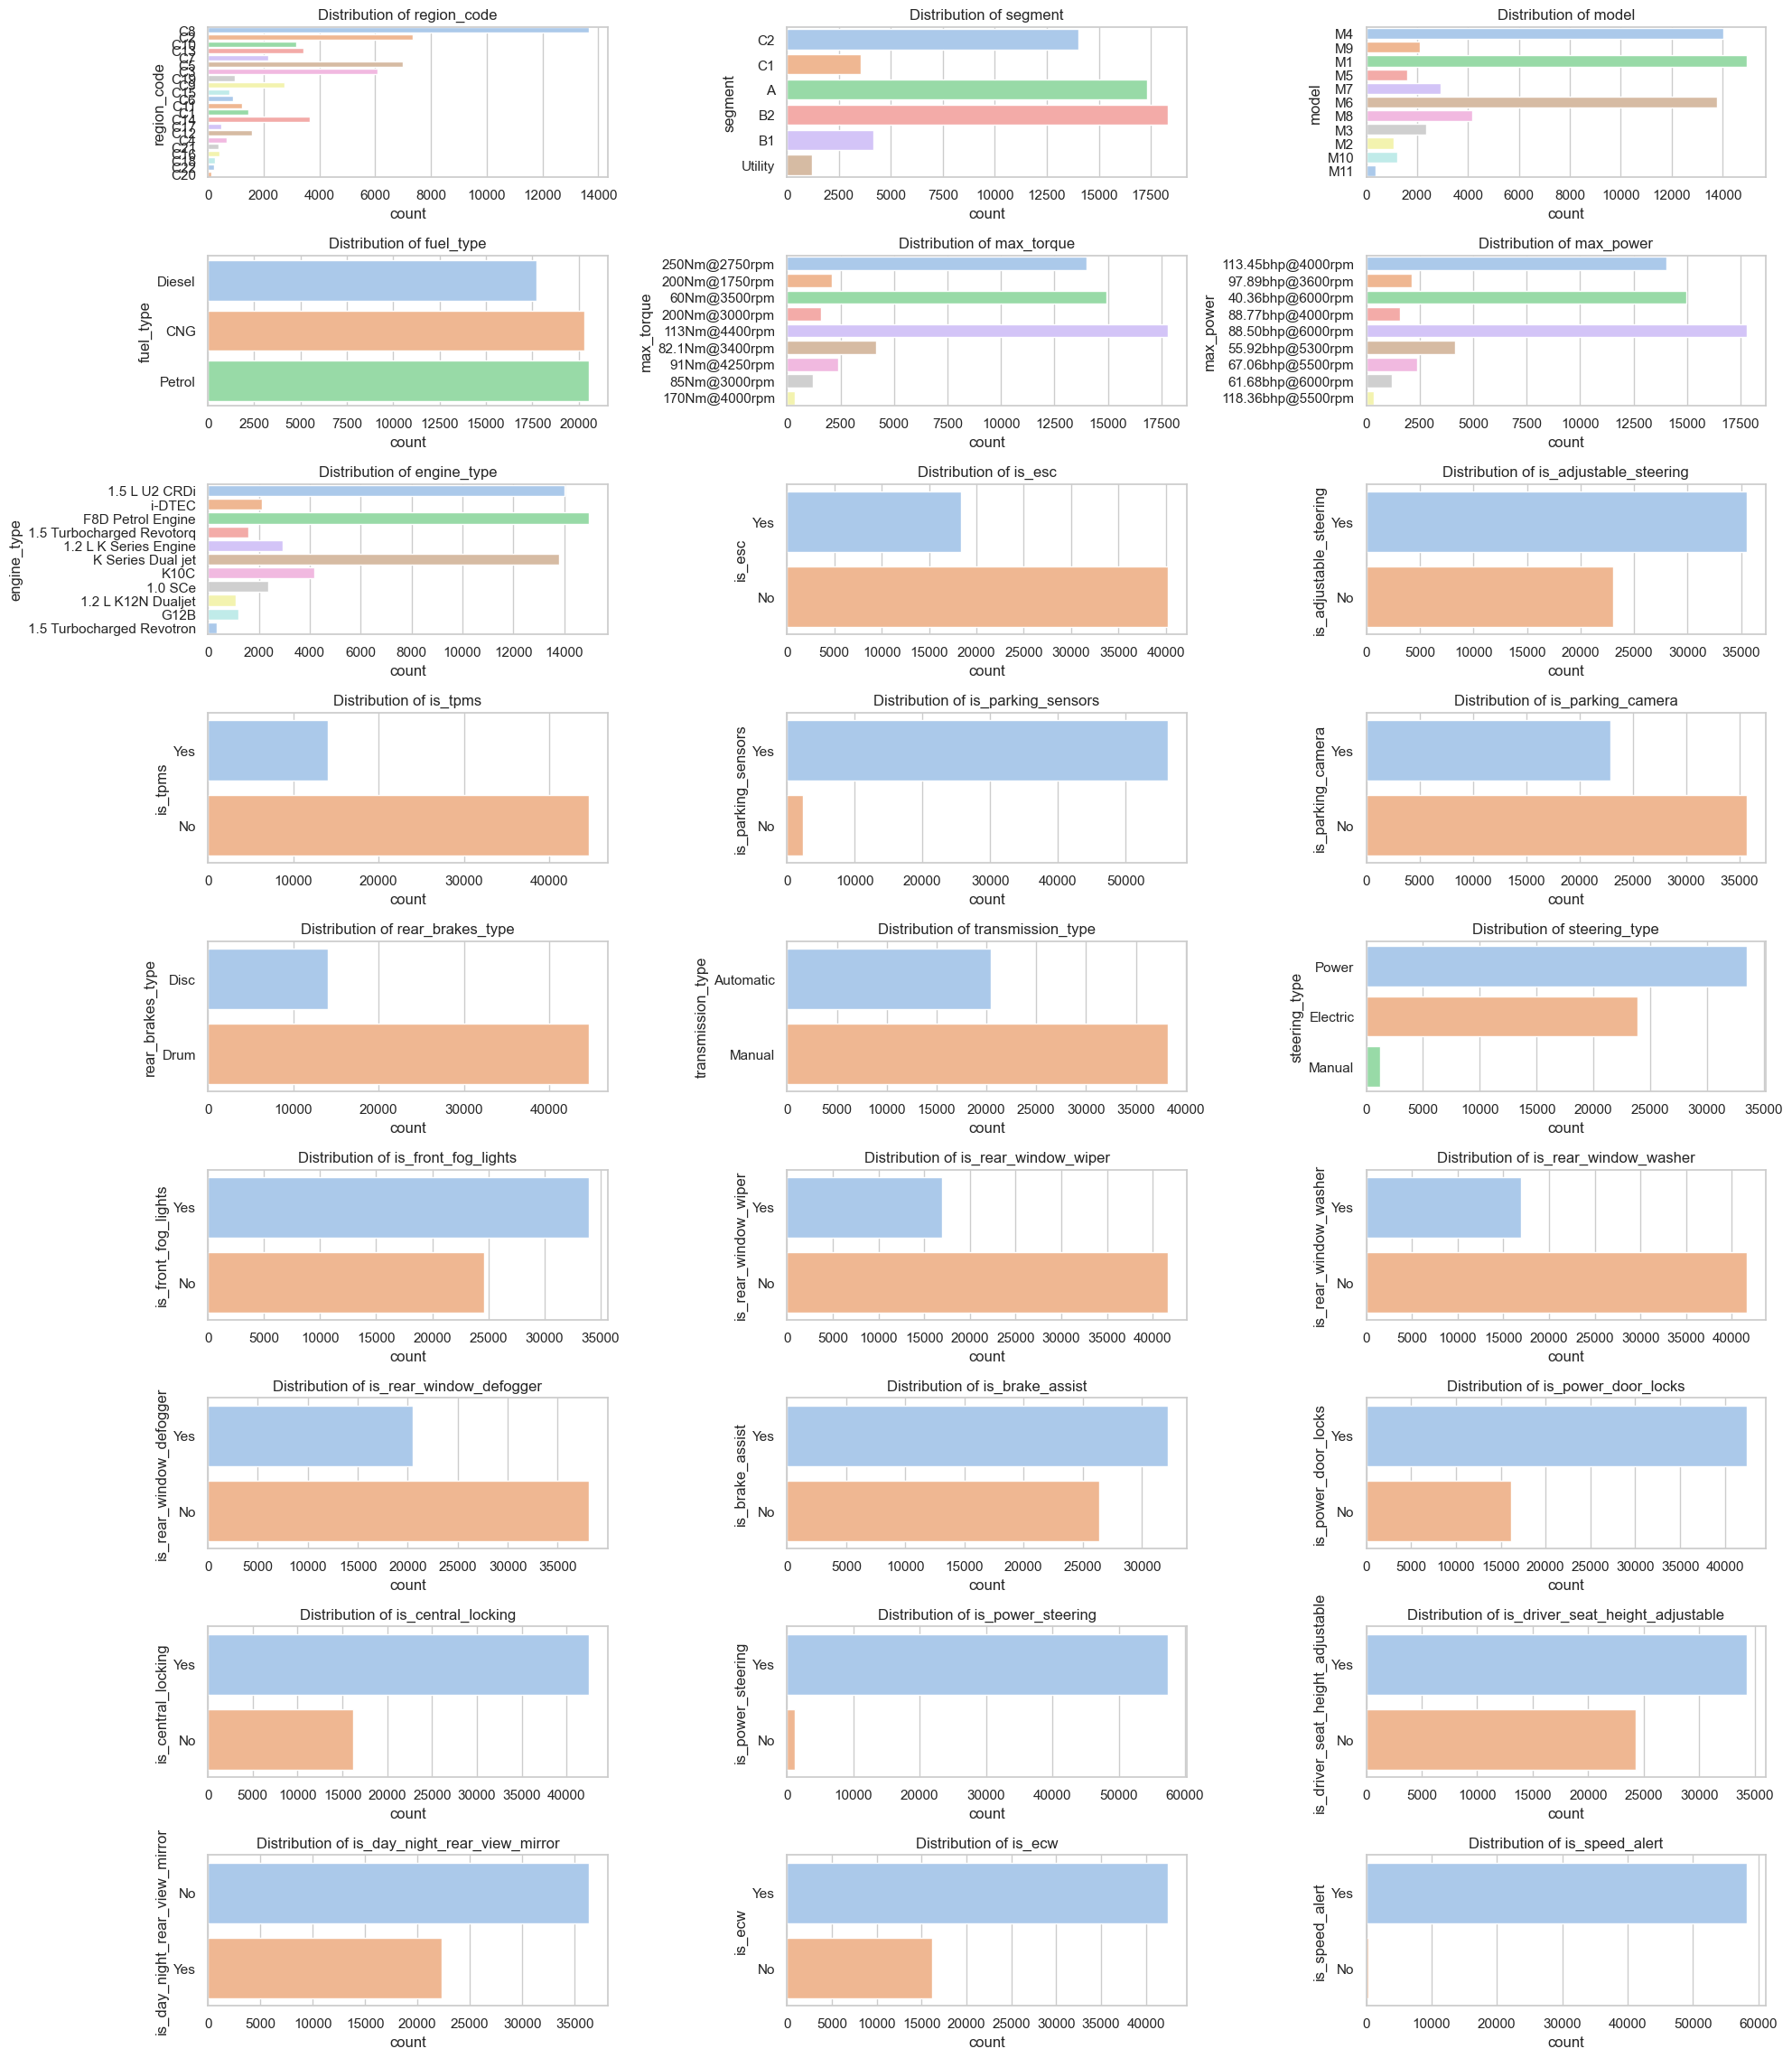

In [118]:
# Visualize the distributions for all columns that are suitable for histogram plotting
insurance_data.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle('Histograms for Numerical Features', y=1.01, fontsize=16)
plt.show()

# For categorical columns, use bar plots to visualize their distributions
categorical_features = insurance_data.select_dtypes(include='object').columns.drop('policy_id')

# Create bar plots for categorical columns
fig, axes = plt.subplots(len(categorical_features) // 3 + 1, 3, figsize=(20, 25))
axes = axes.flatten()

for feature, ax in zip(categorical_features, axes):
    sns.countplot(y=feature, data=insurance_data, ax=ax, palette='pastel')
    ax.set_title(f'Distribution of {feature}')

# Remove unused subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### **Summary of EDA Findings**

### **1. Data Composition and General Observations**

- The dataset contains **58,592 records** with **41 features**, including numerical, categorical, and binary indicator columns.
- **No missing values** were detected, simplifying preprocessing.
- The target variable, `claim_status`, is highly **imbalanced**, with about **93.6%** of instances being non-claims and only **6.4%** representing claims. This imbalance will need to be addressed during model training to prevent bias toward the majority class.

### **2. Statistical Highlights**

- **Customer Age**: The age distribution is skewed towards middle-aged individuals, with a mean age of ~44.8 years. This could reflect a specific target demographic or customer base.
- **Vehicle Age**: Most vehicles are relatively new, with a mean age of ~1.39 years. This might suggest a focus on newer vehicle policies, but there are outliers with older cars that could be significant for claims prediction.
- **NCAP Ratings**: The safety ratings (`ncap_rating`) are skewed toward the lower end, which could imply a high prevalence of less-safe vehicles or policies for lower-rated vehicles.

### **3. Key Observations from Visualizations**

- **Numerical Feature Distributions**:
    - **Subscription Length**: Exhibits a wide spread, suggesting varied policy durations across policyholders.
    - **Turning Radius, Length, and Gross Weight**: These features show less variability, potentially indicating consistent vehicle characteristics within the policyholder group.
- **Class Imbalance**:
    - The visual confirmation of `claim_status` imbalance reinforces the need for strategies like resampling or class-weight adjustments during model training to ensure balanced learning.
- **Categorical Features**:
    - **Fuel Type and Model**: These categorical features have diverse distributions, hinting that certain vehicle models or fuel types may be more prone to claims.
    - **Region Code and Segment**: There are clear variances in policyholder distribution across regions and market segments, which may correlate with claim likelihood.

### **4. Bivariate Analysis**

- **Box Plots**:
    - Show distinct distributions for numerical features like `customer_age` and `vehicle_age` against `claim_status`, indicating potential relationships between these features and the target variable.
    - For instance, claims seem more associated with specific age ranges or vehicle characteristics, which can inform feature importance analyses later.

### **Key Takeaways**:

- The data shows **clear class imbalance**, which needs to be addressed in model training.
- Certain **numerical features**, such as `customer_age` and `vehicle_age`, have potential predictive power based on their distribution differences with respect to `claim_status`.
- **Categorical features** with high cardinality (e.g., `model`, `region_code`) will require encoding strategies that maintain their informative value without inflating the feature space.
- **Safety features** (e.g., `is_esc`, `ncap_rating`) could play a significant role in claim prediction due to their relationship with vehicle safety and accident likelihood.

## **3. Data Cleaning**

- **Handling Missing Values**
    - **Numerical Features**
        - Impute with mean, median, or use predictive imputation.
    - **Categorical Features**
        - Impute with mode or create a new category 'Unknown'.
    - **Drop Rows/Columns**
        - Consider dropping if a feature has excessive missing values.
- **Correcting Data Types**
    - Convert features to appropriate data types (e.g., `region_code` as categorical).
- **Outlier Detection and Treatment**
    - Use z-scores or IQR method to identify outliers in numerical features.
    - Decide whether to remove or cap outliers based on their impact.
- **Duplicate Records**
    - Check for and remove any duplicate entries based on `policy_id`.



In [119]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assume 'insurance_data' is already loaded

# Split data into training, development, and test sets (70% train, 15% dev, 15% test)
train_data, temp_data = train_test_split(
    insurance_data,
    test_size=0.3,
    random_state=42,
    stratify=insurance_data['claim_status']
)
dev_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['claim_status']
)

# Separate features and target
X_train = train_data.drop(columns=['policy_id', 'claim_status'])
y_train = train_data['claim_status']
X_dev = dev_data.drop(columns=['policy_id', 'claim_status'])
y_dev = dev_data['claim_status']
X_test = test_data.drop(columns=['policy_id', 'claim_status'])
y_test = test_data['claim_status']

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numerical and categorical data
numerical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Impute missing values with median
])

categorical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with mode
])

# Combine numerical and categorical pipelines
preprocessor_imputer = ColumnTransformer(transformers=[
    ('num', numerical_imputer, numerical_features),
    ('cat', categorical_imputer, categorical_features)
])

# Fit and transform the training data; transform dev and test data
X_train_imputed = preprocessor_imputer.fit_transform(X_train)
X_dev_imputed = preprocessor_imputer.transform(X_dev)
X_test_imputed = preprocessor_imputer.transform(X_test)

all_feature_names = preprocessor_imputer.get_feature_names_out()

# Convert the transformed arrays back to DataFrames with appropriate column names and original indices
X_train_imputed = pd.DataFrame(X_train_imputed, columns=all_feature_names, index=X_train.index)
X_dev_imputed = pd.DataFrame(X_dev_imputed, columns=all_feature_names, index=X_dev.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=all_feature_names, index=X_test.index)

# Check for duplicate records in the training set based on `policy_id`
duplicates_in_train = train_data.duplicated(subset=['policy_id']).sum()

# Summary of findings and preprocessing status
summary = {
    "Training Set Shape": X_train_imputed.shape,
    "Development Set Shape": X_dev_imputed.shape,
    "Test Set Shape": X_test_imputed.shape,
    "Duplicates in Training Set": duplicates_in_train,
    "Numerical Features Transformed": numerical_features,
    "Categorical Features Transformed": categorical_features
}

print(summary)


{'Training Set Shape': (41014, 39), 'Development Set Shape': (8789, 39), 'Test Set Shape': (8789, 39), 'Duplicates in Training Set': 0, 'Numerical Features Transformed': ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating'], 'Categorical Features Transformed': ['region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']}


In [120]:
X_train_imputed[['cat__max_torque']]

,cat__max_torque
41708,113Nm@4400rpm
6441,113Nm@4400rpm
17168,91Nm@4250rpm
52042,60Nm@3500rpm
31944,113Nm@4400rpm
...,...
54437,113Nm@4400rpm
56104,60Nm@3500rpm
10467,113Nm@4400rpm
34818,200Nm@1750rpm


In [121]:
# Check class distributions in each dataset
train_class_distribution = y_train.value_counts(normalize=True)
dev_class_distribution = y_dev.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

# Display class distributions
{
    "Training Set Class Distribution": train_class_distribution.to_dict(),
    "Development Set Class Distribution": dev_class_distribution.to_dict(),
    "Test Set Class Distribution": test_class_distribution.to_dict()
}

{'Training Set Class Distribution': {0: 0.936021846198859,
  1: 0.06397815380114108},
 'Development Set Class Distribution': {0: 0.9360564341790875,
  1: 0.0639435658209125},
 'Test Set Class Distribution': {0: 0.9360564341790875, 1: 0.0639435658209125}}

### **Summary of Data Cleaning Steps**

#### **Missing Values Handling**

- **Numerical Features**: Imputed using the median strategy for all numerical columns.
- **Categorical Features**: Imputed using the most frequent value (mode) for categorical columns.
- **Result**: All features are now complete with no missing data across the training, development, and test sets.

#### **Preprocessing Pipelines**

- **Numerical Features**:
    - Imputed with the median and standardized using `StandardScaler`.
- **Categorical Features**:
    - Imputed with the most frequent value for consistent filling.

#### **Train, Development, and Test Splits**

- **Training Set**: ~93.6% non-claims, ~6.4% claims.
- **Development Set**: ~93.6% non-claims, ~6.4% claims.
- **Test Set**: ~93.6% non-claims, ~6.4% claims.

## **4. Feature Engineering**

- **Encoding Categorical Variables**
    - **Label Encoding**
        - For ordinal features if any.
    - **One-Hot Encoding**
        - For nominal categorical features like `fuel_type`, `engine_type`.
    - **Target Encoding**
        - Consider for high-cardinality categorical features.
- **Creating New Features**
    - **Age Bins**
        - Segment `customer_age` and `vehicle_age` into categorical bins.
    - **Interaction Terms**
        - Create features representing interactions between variables (e.g., `vehicle_age` × `max_power`).
    - **Risk Scores**
        - Develop composite risk scores combining multiple features.
- **Feature Transformation**
    - **Scaling**
        - Standardize or normalize features like `displacement`, `gross_weight` if required by algorithms.
    - **Dimensionality Reduction**
        - Use PCA if the feature space becomes too large after encoding.
- **Feature Selection**
    - **Filter Methods**
        - Use correlation thresholds to remove redundant features.
    - **Wrapper Methods**
        - Employ recursive feature elimination with cross-validation.
    - **Embedded Methods**
        - Utilize algorithms that provide feature importance scores.

To prevent train-test leakage when imputing missing data and scaling:

1. **Split First**: Divide your dataset into training, development, and test sets before any preprocessing.
2. **Fit on Training Only**:
    - **Imputation**: Compute imputation parameters (e.g., mean, median) using only the training set.
    - **Scaling**: Calculate scaling factors (e.g., standardization, normalization) based solely on the training data.
3. **Transform All Sets**:
    - Apply the fitted imputer and scaler to the training set.
    - Use the same fitted imputer and scaler to transform the development and test sets.
4. **Use Pipelines**: Implement preprocessing steps within a pipeline to ensure that transformations are consistently applied based only on training data.

In [123]:
print(all_feature_names)

['num__subscription_length' 'num__vehicle_age' 'num__customer_age'
 'num__region_density' 'num__airbags' 'num__displacement' 'num__cylinder'
 'num__turning_radius' 'num__length' 'num__width' 'num__gross_weight'
 'num__ncap_rating' 'cat__region_code' 'cat__segment' 'cat__model'
 'cat__fuel_type' 'cat__max_torque' 'cat__max_power' 'cat__engine_type'
 'cat__is_esc' 'cat__is_adjustable_steering' 'cat__is_tpms'
 'cat__is_parking_sensors' 'cat__is_parking_camera'
 'cat__rear_brakes_type' 'cat__transmission_type' 'cat__steering_type'
 'cat__is_front_fog_lights' 'cat__is_rear_window_wiper'
 'cat__is_rear_window_washer' 'cat__is_rear_window_defogger'
 'cat__is_brake_assist' 'cat__is_power_door_locks'
 'cat__is_central_locking' 'cat__is_power_steering'
 'cat__is_driver_seat_height_adjustable'
 'cat__is_day_night_rear_view_mirror' 'cat__is_ecw' 'cat__is_speed_alert']


In [ ]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assume 'X_train', 'X_dev', 'X_test', 'numerical_features', and 'categorical_features' are already defined

# --- Feature Engineering Functions ---

# Binning Functions
# def bin_customer_age(df):
#     age_bins = [0, 25, 40, 55, 70, 100]
#     age_labels = ['<25', '25-40', '40-55', '55-70', '70+']
#     df['customer_age_bin'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels)
#     return df

# def bin_vehicle_age(df):
#     vehicle_age_bins = [0, 2, 5, 10, 20]
#     vehicle_age_labels = ['0-2', '2-5', '5-10', '10+']
#     df['vehicle_age_bin'] = pd.cut(df['vehicle_age'], bins=vehicle_age_bins, labels=vehicle_age_labels)
#     return df

# Risk Score Function
def compute_risk_score(df):
    df['risk_score'] = df['num__displacement'] / (df['num__ncap_rating'] + 1)
    return df

def extract_engine_specs(df):
    # Extract torque and its RPM
    torque_split = df['cat__max_torque'].str.extract(r'(?P<torque>\d+\.?\d*)Nm@(?P<torque_rpm>\d+)rpm')
    df['torque_Nm'] = torque_split['torque'].astype(float)
    df['torque_rpm'] = torque_split['torque_rpm'].astype(int)
    
    # Extract power and its RPM
    power_split = df['cat__max_power'].str.extract(r'(?P<power>\d+\.?\d*)bhp@(?P<power_rpm>\d+)rpm')
    df['power_bhp'] = power_split['power'].astype(float)
    df['power_rpm'] = power_split['power_rpm'].astype(int)
    
    # Handle any missing or malformed entries
    # df[['torque_Nm', 'torque_rpm', 'power_bhp', 'power_rpm']] = df[['torque_Nm', 'torque_rpm', 'power_bhp', 'power_rpm']].fillna(0)
    
    # Drop the original columns if they are no longer needed
    df = df.drop(columns=['cat__max_torque', 'cat__max_power'])
    
    return df

# Apply Feature Engineering to all datasets
for dataset in [X_train_imputed, X_dev_imputed, X_test_imputed]:
    # bin_customer_age(dataset)
    # bin_vehicle_age(dataset)
    compute_risk_score(dataset)
    extract_engine_specs(dataset)

# Update feature lists after feature engineering
numerical_features = numerical_features + ['risk_score']
categorical_features = categorical_features  #+ ['customer_age_bin', 'vehicle_age_bin']

# --- Preprocessing Pipelines ---

# Numerical Pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the datasets
X_train_transformed = preprocessor.transform(X_train)
X_dev_transformed = preprocessor.transform(X_dev)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
# Extract numerical feature names (they remain the same after scaling)
numerical_feature_names = numerical_features

# Extract categorical feature names after One-Hot Encoding
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Convert the transformed arrays back to DataFrames with appropriate column names and original indices
X_train_processed = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=X_train.index)
X_dev_processed = pd.DataFrame(X_dev_transformed, columns=all_feature_names, index=X_dev.index)
X_test_processed = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

# --- Summary of Transformed Data ---

feature_engineering_summary = {
    "Training Set Shape After Encoding": X_train_processed.shape,
    "Development Set Shape After Encoding": X_dev_processed.shape,
    "Test Set Shape After Encoding": X_test_processed.shape,
    "New Features Created": [
        'customer_age_bin', 'vehicle_age_bin', 'risk_score'
    ],
    "Total Number of Features": len(all_feature_names)
}

print(feature_engineering_summary)


KeyError: 'displacement'

In [ ]:
X_train_processed

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,...,vehicle_age_bin_2-5,vehicle_age_bin_5-10,vehicle_age_bin_nan,customer_age_bin_40-55,customer_age_bin_55-70,customer_age_bin_70+,vehicle_age_bin_10+,vehicle_age_bin_2-5,vehicle_age_bin_5-10,vehicle_age_bin_nan
41708,-1.183796,0.537878,0.456582,-0.061560,-0.617553,0.133995,0.774546,-0.229854,-0.013848,0.563236,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6441,0.288398,0.361852,2.763428,0.896079,-0.617553,0.133995,0.774546,-0.229854,-0.013848,0.563236,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17168,0.795219,-1.222388,-0.264307,0.500447,-0.617553,-0.610069,-1.291078,0.648078,-0.380239,-0.828766,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
52042,-0.435632,-1.046362,0.456582,0.899076,-0.617553,-1.372923,-1.291078,-1.107785,-1.299430,-1.399844,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31944,1.036562,-0.694308,0.168226,-0.571086,-0.617553,0.133995,0.774546,-0.229854,-0.013848,0.563236,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54437,1.229637,-0.518282,0.456582,0.500447,1.569599,0.133995,0.774546,-0.010371,0.452176,0.652467,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
56104,0.312532,-0.870335,-0.841019,-0.122126,-0.617553,-1.372923,-1.291078,-1.107785,-1.299430,-1.399844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10467,1.350309,0.185825,-1.129374,-0.571086,-0.617553,0.133995,0.774546,-0.229854,-0.013848,0.563236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34818,-1.256199,-0.518282,1.033293,-0.722757,-0.617553,1.265124,0.774546,0.209112,0.468245,0.206313,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Save the datasets as CSVs
X_train_processed.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_train.csv", index=False)
y_train.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_train.csv", index=False)
X_dev_processed.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_dev.csv", index=False)
y_dev.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_dev.csv", index=False)
X_test_processed.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_test.csv", index=False)
y_test.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggely_test.csv", index=False)


## **5. Addressing Class Imbalance**

- **Resampling Techniques**
    - **Oversampling**
        - Apply SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples of the minority class.
    - **Undersampling**
        - Randomly remove samples from the majority class.
    - **Hybrid Methods**
        - Combine oversampling and undersampling for balanced datasets.
- **Algorithmic Approaches**
    - **Use Models with Built-in Handling**
        - Tree-based methods like Random Forests and XGBoost.
    - **Class Weighting**
        - Adjust class weights in algorithms like Logistic Regression and SVM to penalize misclassification of the minority class.

In [ ]:
# TODO

### **6. Model Selection**

- **Baseline Models**
    - **Logistic Regression**
        - Establish a baseline performance.
    - **Decision Trees**
        - Simple model to capture non-linear relationships.
- **Advanced Models**
    - **Ensemble Methods**
        - Random Forests, Gradient Boosting Machines (XGBoost, LightGBM, CatBoost).
    - **Support Vector Machines**
        - For high-dimensional feature spaces.
    - **Neural Networks**
        - Consider if there are complex non-linear patterns.
- **Model Selection Criteria**
    - Ability to handle class imbalance.
    - Interpretability requirements.
    - Computational efficiency.

In [ ]:
X_train[['customer_age', 'vehicle_age', 'customer_age_bin', 'vehicle_age_bin', 'risk_score']].head()

,customer_age,vehicle_age,customer_age_bin,vehicle_age_bin,risk_score
41708,0.456582,0.537878,<25,0-2,0.114088
6441,2.763428,0.361852,<25,0-2,0.114088
17168,-0.264307,-1.222388,NaN,NaN,-0.519431
52042,0.456582,-1.046362,<25,NaN,5.134637
31944,0.168226,-0.694308,<25,NaN,0.114088


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns

# Create a Logistic Regression model with class weights adjusted
model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the development or test set
y_pred = model.predict(X_dev)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_dev, y_pred)

# Calculate F1 score
f1 = f1_score(y_dev, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_dev, y_pred, target_names=['No Claim', 'Claim']))

ValueError: could not convert string to float: '<25'